In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../../data/raw/train.csv")

In [3]:
df

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
...,...,...,...,...,...,...,...,...,...
1710665,1404171463620000698,C,NaN,NaN,20000698,1404171463,A,False,"[[-8.612469,41.14602],[-8.612487,41.145993],[-..."
1710666,1404171367620000670,C,NaN,NaN,20000670,1404171367,A,False,"[[-8.610138,41.140845],[-8.610174,41.140935],[..."
1710667,1388745716620000264,C,NaN,NaN,20000264,1388745716,A,False,[]
1710668,1404141826620000248,B,NaN,12.0,20000248,1404141826,A,False,"[[-8.630712,41.154885],[-8.63073,41.154813],[-..."


In [4]:
df.value_counts("DAY_TYPE")

DAY_TYPE
A    1710670
Name: count, dtype: int64

In [5]:
df = df.drop(columns=["CALL_TYPE", "ORIGIN_CALL", "ORIGIN_STAND", "DAY_TYPE", "MISSING_DATA", "POLYLINE"])
df

,TRIP_ID,TAXI_ID,TIMESTAMP
0,1372636858620000589,20000589,1372636858
1,1372637303620000596,20000596,1372637303
2,1372636951620000320,20000320,1372636951
3,1372636854620000520,20000520,1372636854
4,1372637091620000337,20000337,1372637091
...,...,...,...
1710665,1404171463620000698,20000698,1404171463
1710666,1404171367620000670,20000670,1404171367
1710667,1388745716620000264,20000264,1388745716
1710668,1404141826620000248,20000248,1404141826


In [6]:
df.value_counts("TAXI_ID")

TAXI_ID
20000080    10746
20000403     9238
20000066     8449
20000364     7821
20000483     7729
            ...  
20000264        2
20000911        2
20000940        1
20000970        1
20000931        1
Name: count, Length: 448, dtype: int64

In [7]:
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"], unit="s")
df

,TRIP_ID,TAXI_ID,TIMESTAMP
0,1372636858620000589,20000589,2013-07-01 00:00:58
1,1372637303620000596,20000596,2013-07-01 00:08:23
2,1372636951620000320,20000320,2013-07-01 00:02:31
3,1372636854620000520,20000520,2013-07-01 00:00:54
4,1372637091620000337,20000337,2013-07-01 00:04:51
...,...,...,...
1710665,1404171463620000698,20000698,2014-06-30 23:37:43
1710666,1404171367620000670,20000670,2014-06-30 23:36:07
1710667,1388745716620000264,20000264,2014-01-03 10:41:56
1710668,1404141826620000248,20000248,2014-06-30 15:23:46


In [8]:
def part_of_day(hour):
    if 6 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "afternoon"
    elif 18 <= hour < 24:
        return "evening"
    else:
        return "night"

In [9]:
df["part_of_day"] = df["TIMESTAMP"].dt.hour.map(part_of_day)
df["day_of_week"] = df["TIMESTAMP"].dt.day_name()

In [10]:
df["date"] = df["TIMESTAMP"].dt.date

In [11]:
grouped = (
    df.groupby(["date", "day_of_week", "part_of_day"])
    .size()
    .reset_index(name="num_of_rides")
)

In [12]:
grouped

,date,day_of_week,part_of_day,num_of_rides
0,2013-07-01,Monday,afternoon,1687
1,2013-07-01,Monday,evening,889
2,2013-07-01,Monday,morning,1696
3,2013-07-01,Monday,night,462
4,2013-07-02,Tuesday,afternoon,1675
...,...,...,...,...
1455,2014-06-29,Sunday,night,1687
1456,2014-06-30,Monday,afternoon,1732
1457,2014-06-30,Monday,evening,1009
1458,2014-06-30,Monday,morning,1591


In [13]:
grouped["segment"] = grouped["day_of_week"] + "_" + grouped["part_of_day"]

In [14]:
grouped

,date,day_of_week,part_of_day,num_of_rides,segment
0,2013-07-01,Monday,afternoon,1687,Monday_afternoon
1,2013-07-01,Monday,evening,889,Monday_evening
2,2013-07-01,Monday,morning,1696,Monday_morning
3,2013-07-01,Monday,night,462,Monday_night
4,2013-07-02,Tuesday,afternoon,1675,Tuesday_afternoon
...,...,...,...,...,...
1455,2014-06-29,Sunday,night,1687,Sunday_night
1456,2014-06-30,Monday,afternoon,1732,Monday_afternoon
1457,2014-06-30,Monday,evening,1009,Monday_evening
1458,2014-06-30,Monday,morning,1591,Monday_morning


In [15]:
import seaborn as sns

In [16]:
import matplotlib.pyplot as plt

In [17]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [18]:
avg_by_weekday = (
    grouped.groupby("day_of_week")["num_of_rides"]
    .mean()
    .reindex(weekday_order)
)

C:\Users\Nikola\AppData\Local\Temp\ipykernel_6500\3812764181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_weekday.index, y=avg_by_weekday.values, palette="viridis")


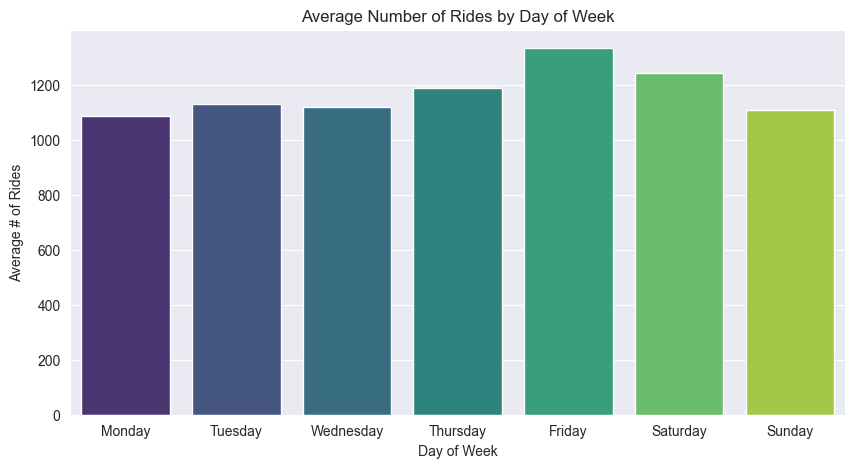

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_by_weekday.index, y=avg_by_weekday.values, palette="viridis")
plt.title("Average Number of Rides by Day of Week")
plt.ylabel("Average # of Rides")
plt.xlabel("Day of Week")
plt.show()

In [28]:
part_order = ["night", "morning", "afternoon", "evening"]

In [29]:
avg_by_part = (
    grouped.groupby("part_of_day")["num_of_rides"]
    .mean()
    .reindex(part_order)
)

C:\Users\Nikola\AppData\Local\Temp\ipykernel_6500\3174980335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_part.index, y=avg_by_part.values, palette="magma")


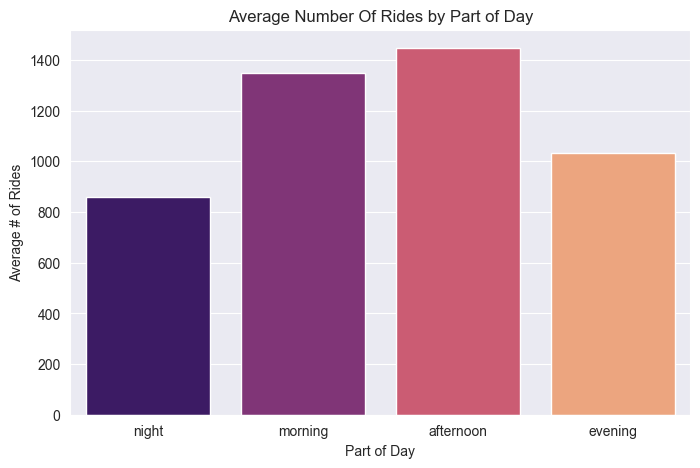

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_by_part.index, y=avg_by_part.values, palette="magma")
plt.title("Average Number Of Rides by Part of Day")
plt.ylabel("Average # of Rides")
plt.xlabel("Part of Day")
plt.show()

In [31]:
avg_by_segment = (
    grouped.groupby(["day_of_week", "part_of_day"])["num_of_rides"]
    .mean()
    .reset_index()
)

In [32]:
heatmap_data = avg_by_segment.pivot(index="day_of_week", columns="part_of_day", values="num_of_rides")

In [33]:
heatmap_data = heatmap_data.reindex(index=weekday_order, columns=part_order)

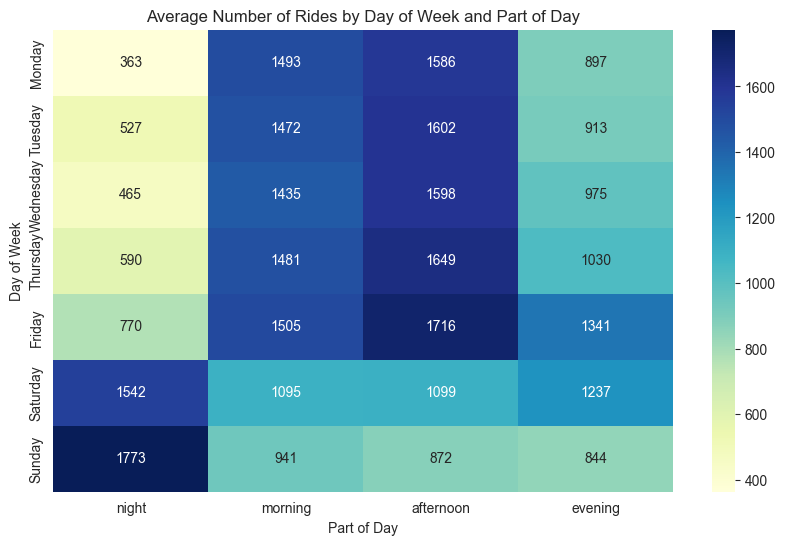

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Number of Rides by Day of Week and Part of Day")
plt.ylabel("Day of Week")
plt.xlabel("Part of Day")
plt.show()

In [35]:
grouped

,date,day_of_week,part_of_day,num_of_rides,segment
0,2013-07-01,Monday,afternoon,1687,Monday_afternoon
1,2013-07-01,Monday,evening,889,Monday_evening
2,2013-07-01,Monday,morning,1696,Monday_morning
3,2013-07-01,Monday,night,462,Monday_night
4,2013-07-02,Tuesday,afternoon,1675,Tuesday_afternoon
...,...,...,...,...,...
1455,2014-06-29,Sunday,night,1687,Sunday_night
1456,2014-06-30,Monday,afternoon,1732,Monday_afternoon
1457,2014-06-30,Monday,evening,1009,Monday_evening
1458,2014-06-30,Monday,morning,1591,Monday_morning


In [41]:
grouped['date'] = pd.to_datetime(grouped['date']).dt.date
grouped

,date,day_of_week,part_of_day,num_of_rides,segment
0,2013-07-01,Monday,afternoon,1687,Monday_afternoon
1,2013-07-01,Monday,evening,889,Monday_evening
2,2013-07-01,Monday,morning,1696,Monday_morning
3,2013-07-01,Monday,night,462,Monday_night
4,2013-07-02,Tuesday,afternoon,1675,Tuesday_afternoon
...,...,...,...,...,...
1455,2014-06-29,Sunday,night,1687,Sunday_night
1456,2014-06-30,Monday,afternoon,1732,Monday_afternoon
1457,2014-06-30,Monday,evening,1009,Monday_evening
1458,2014-06-30,Monday,morning,1591,Monday_morning


In [42]:
grouped.to_csv("../../../data/taxi-allocation.csv", index=False)

In [43]:
grouped['date'] = pd.to_datetime(grouped['date'])
grouped

,date,day_of_week,part_of_day,num_of_rides,segment
0,2013-07-01,Monday,afternoon,1687,Monday_afternoon
1,2013-07-01,Monday,evening,889,Monday_evening
2,2013-07-01,Monday,morning,1696,Monday_morning
3,2013-07-01,Monday,night,462,Monday_night
4,2013-07-02,Tuesday,afternoon,1675,Tuesday_afternoon
...,...,...,...,...,...
1455,2014-06-29,Sunday,night,1687,Sunday_night
1456,2014-06-30,Monday,afternoon,1732,Monday_afternoon
1457,2014-06-30,Monday,evening,1009,Monday_evening
1458,2014-06-30,Monday,morning,1591,Monday_morning


In [44]:
import timesfm

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)].


In [45]:
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=32,
          horizon_len=5,
          num_layers=50,
          use_positional_embedding=False,
          context_len=10,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [47]:
grouped = grouped.rename(columns={"date": "ds", "segment": "unique_id", "num_of_rides": "y"})
grouped

,ds,day_of_week,part_of_day,y,unique_id
0,2013-07-01,Monday,afternoon,1687,Monday_afternoon
1,2013-07-01,Monday,evening,889,Monday_evening
2,2013-07-01,Monday,morning,1696,Monday_morning
3,2013-07-01,Monday,night,462,Monday_night
4,2013-07-02,Tuesday,afternoon,1675,Tuesday_afternoon
...,...,...,...,...,...
1455,2014-06-29,Sunday,night,1687,Sunday_night
1456,2014-06-30,Monday,afternoon,1732,Monday_afternoon
1457,2014-06-30,Monday,evening,1009,Monday_evening
1458,2014-06-30,Monday,morning,1591,Monday_morning


In [48]:
day_map = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}

In [49]:
part_map = {
    "night": 1,
    "morning": 2,
    "afternoon": 3,
    "evening": 4,
}

In [51]:
day_part_split = grouped['unique_id'].str.split("_", expand=True)
grouped['day_num'] = day_part_split[0].map(day_map)
grouped['part_num'] = day_part_split[1].map(part_map)

In [52]:
grouped['unique_id'] = grouped['day_num'] + grouped['part_num']/10

In [53]:
grouped

,ds,day_of_week,part_of_day,y,unique_id,day_num,part_num
0,2013-07-01,Monday,afternoon,1687,1.3,1,3
1,2013-07-01,Monday,evening,889,1.4,1,4
2,2013-07-01,Monday,morning,1696,1.2,1,2
3,2013-07-01,Monday,night,462,1.1,1,1
4,2013-07-02,Tuesday,afternoon,1675,2.3,2,3
...,...,...,...,...,...,...,...
1455,2014-06-29,Sunday,night,1687,7.1,7,1
1456,2014-06-30,Monday,afternoon,1732,1.3,1,3
1457,2014-06-30,Monday,evening,1009,1.4,1,4
1458,2014-06-30,Monday,morning,1591,1.2,1,2


In [55]:
rides_grouped = grouped.sort_values(by=['ds', 'unique_id']).reset_index(drop=True)

In [56]:
unique_dates = rides_grouped['ds'].drop_duplicates().sort_values()
num_dates = len(unique_dates)

In [57]:
train_size = int(num_dates * 0.8)
train_dates = unique_dates[:train_size]
test_dates  = unique_dates[train_size:]

In [58]:
train_df = rides_grouped[rides_grouped['ds'].isin(train_dates)].reset_index(drop=True)
test_df  = rides_grouped[rides_grouped['ds'].isin(test_dates)].reset_index(drop=True)

In [59]:
train_df

,ds,day_of_week,part_of_day,y,unique_id,day_num,part_num
0,2013-07-01,Monday,night,462,1.1,1,1
1,2013-07-01,Monday,morning,1696,1.2,1,2
2,2013-07-01,Monday,afternoon,1687,1.3,1,3
3,2013-07-01,Monday,evening,889,1.4,1,4
4,2013-07-02,Tuesday,night,551,2.1,2,1
...,...,...,...,...,...,...,...
1163,2014-04-17,Thursday,evening,1506,4.4,4,4
1164,2014-04-18,Friday,night,1643,5.1,5,1
1165,2014-04-18,Friday,morning,1019,5.2,5,2
1166,2014-04-18,Friday,afternoon,1015,5.3,5,3


In [61]:
train_df = train_df.drop(columns=["day_of_week", "part_of_day", "day_num", "part_num"])

In [63]:
train_df

,ds,y,unique_id
0,2013-07-01,462,1.1
1,2013-07-01,1696,1.2
2,2013-07-01,1687,1.3
3,2013-07-01,889,1.4
4,2013-07-02,551,2.1
...,...,...,...
1163,2014-04-17,1506,4.4
1164,2014-04-18,1643,5.1
1165,2014-04-18,1019,5.2
1166,2014-04-18,1015,5.3


In [74]:
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=32,
          horizon_len=10,
          num_layers=50,
          use_positional_embedding=False,
          context_len=32,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [75]:
forecast = tfm.forecast_on_df(
    inputs=train_df,
    freq="7d",
    value_name="y",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [76]:
test_df

,ds,day_of_week,part_of_day,y,unique_id,day_num,part_num
0,2014-04-19,Saturday,night,1313,6.1,6,1
1,2014-04-19,Saturday,morning,877,6.2,6,2
2,2014-04-19,Saturday,afternoon,1000,6.3,6,3
3,2014-04-19,Saturday,evening,1171,6.4,6,4
4,2014-04-20,Sunday,night,1328,7.1,7,1
...,...,...,...,...,...,...,...
287,2014-06-29,Sunday,evening,772,7.4,7,4
288,2014-06-30,Monday,night,394,1.1,1,1
289,2014-06-30,Monday,morning,1591,1.2,1,2
290,2014-06-30,Monday,afternoon,1732,1.3,1,3


In [77]:
forecast

,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,1.1,2014-04-21,309.370331,274.174469,285.022705,293.781708,301.489441,309.370331,318.203156,327.990784,341.116974,362.477356
1,1.1,2014-04-28,307.519135,272.271423,282.951447,291.773163,299.437103,307.519135,316.451538,326.384888,340.020660,362.826477
2,1.1,2014-05-05,308.569824,271.839844,282.962006,292.133545,300.202026,308.569824,317.996277,328.248962,342.578003,366.543457
3,1.1,2014-05-12,308.793884,271.040070,282.542816,291.861206,300.104370,308.793884,318.287262,328.868591,343.730530,368.232117
4,1.1,2014-05-19,309.425873,270.441315,282.064423,291.831451,300.408142,309.425873,319.384155,330.604767,346.196472,371.998840
...,...,...,...,...,...,...,...,...,...,...,...,...
275,7.4,2014-05-25,778.403564,698.834778,721.096252,740.512268,758.896729,778.403564,800.120300,824.871826,858.997375,916.733093
276,7.4,2014-06-01,773.702759,696.438232,717.619324,736.379211,754.070557,773.702759,795.556702,820.434753,855.009583,912.386414
277,7.4,2014-06-08,765.366272,692.270996,711.648315,729.327332,746.284790,765.366272,786.531677,810.979736,845.454834,902.411255
278,7.4,2014-06-15,760.064331,690.604492,708.936401,725.401428,741.757507,760.064331,780.712402,805.012695,839.338135,897.315430


In [78]:
result = test_df.merge(forecast, how='left', on=['unique_id', 'ds'])
result

,ds,day_of_week,part_of_day,y,unique_id,day_num,part_num,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,2014-04-19,Saturday,night,1313,6.1,6,1,1542.066772,1301.392090,1374.907349,1435.508789,1487.718018,1542.066772,1600.862305,1666.752441,1753.289551,1886.057617
1,2014-04-19,Saturday,morning,877,6.2,6,2,1092.546021,999.000000,1026.070557,1049.004639,1069.902100,1092.546021,1117.539795,1147.196533,1187.151001,1250.953857
2,2014-04-19,Saturday,afternoon,1000,6.3,6,3,1095.134521,948.936218,996.565369,1030.656616,1063.545166,1095.134521,1126.777100,1165.577393,1215.292480,1291.964355
3,2014-04-19,Saturday,evening,1171,6.4,6,4,1199.330811,1007.285034,1071.819702,1119.681641,1159.704224,1199.330811,1240.294922,1284.029663,1341.984009,1433.035156
4,2014-04-20,Sunday,night,1328,7.1,7,1,1916.992798,1590.529419,1700.035522,1782.812622,1851.420532,1916.992798,1982.520386,2051.271240,2139.244141,2278.280762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2014-06-29,Sunday,evening,772,7.4,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2014-06-30,Monday,night,394,1.1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,2014-06-30,Monday,morning,1591,1.2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,2014-06-30,Monday,afternoon,1732,1.3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
pred_cols = [col for col in result.columns if col.startswith("timesfm")]
df_clean = result.dropna(subset=pred_cols).reset_index(drop=True)

In [81]:
import numpy as np

In [82]:
def quantile_loss(y_true, y_pred, q):
    e = y_true - y_pred
    return np.mean(np.maximum(q * e, (q-1) * e))

In [83]:
quantiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [85]:
for q in quantiles:
    col = f"timesfm-q-{q}"
    loss = quantile_loss(df_clean['y'], df_clean[col], q)
    print(f"Quantile loss q={q}: {loss:.3f}")

Quantile loss q=0.1: 43.835
Quantile loss q=0.2: 69.047
Quantile loss q=0.3: 87.373
Quantile loss q=0.4: 100.381
Quantile loss q=0.5: 107.665
Quantile loss q=0.6: 107.681
Quantile loss q=0.7: 100.591
Quantile loss q=0.8: 86.907
Quantile loss q=0.9: 65.297


In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [87]:
y_true = df_clean['y']
y_pred = df_clean['timesfm']

In [89]:
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 215.3291473388672
RMSE: 118406.296875


In [90]:
lower = df_clean['timesfm-q-0.1']
upper = df_clean['timesfm-q-0.9']
coverage = ((df_clean['y'] >= lower) & (df_clean['y'] <= upper)).mean()
print("Coverage (10%-90% interval):", coverage)

Coverage (10%-90% interval): 0.7285714285714285


In [92]:
result['y'].describe()

count     292.000000
mean     1258.349315
std       506.809671
min       288.000000
25%       903.250000
50%      1283.000000
75%      1662.500000
max      3159.000000
Name: y, dtype: float64

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df['y'] = scaler.fit_transform(train_df[['y']])

In [98]:
train_df

,ds,y,unique_id
0,2013-07-01,0.078119,1.1
1,2013-07-01,0.514316,1.2
2,2013-07-01,0.511135,1.3
3,2013-07-01,0.229056,1.4
4,2013-07-02,0.109579,2.1
...,...,...,...
1163,2014-04-17,0.447154,4.4
1164,2014-04-18,0.495581,5.1
1165,2014-04-18,0.275009,5.2
1166,2014-04-18,0.273595,5.3


In [94]:
forecast = tfm.forecast_on_df(
    inputs=train_df,
    freq="7d",
    value_name="y",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [95]:
result = test_df.merge(forecast, how='left', on=['unique_id', 'ds'])

In [96]:
pred_cols = [col for col in result.columns if col.startswith("timesfm")]
df_clean = result.dropna(subset=pred_cols).reset_index(drop=True)

In [97]:
df_clean

,ds,day_of_week,part_of_day,y,unique_id,day_num,part_num,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,2014-04-19,Saturday,night,1313,6.1,6,1,0.459903,0.374829,0.400816,0.422237,0.440692,0.459903,0.480686,0.503977,0.534567,0.581498
1,2014-04-19,Saturday,morning,877,6.2,6,2,0.301006,0.267939,0.277508,0.285615,0.293002,0.301006,0.309841,0.320324,0.334447,0.357000
2,2014-04-19,Saturday,afternoon,1000,6.3,6,3,0.301921,0.250243,0.267079,0.279129,0.290755,0.301921,0.313106,0.326821,0.344395,0.371497
3,2014-04-19,Saturday,evening,1171,6.4,6,4,0.338753,0.270868,0.293680,0.310598,0.324745,0.338753,0.353233,0.368692,0.389178,0.421363
4,2014-04-20,Sunday,night,1328,7.1,7,1,0.592433,0.477034,0.515743,0.545003,0.569254,0.592433,0.615596,0.639898,0.670995,0.720142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2014-06-26,Thursday,evening,1066,4.4,4,4,0.262813,0.224700,0.232630,0.243507,0.252967,0.262813,0.275133,0.289952,0.311133,0.347580
276,2014-06-27,Friday,night,742,5.1,5,1,0.109424,0.071803,0.081232,0.089810,0.099187,0.109424,0.122780,0.141830,0.171123,0.227897
277,2014-06-27,Friday,morning,1633,5.2,5,2,0.404043,0.243080,0.307172,0.345241,0.375472,0.404043,0.433095,0.465057,0.505534,0.568546
278,2014-06-27,Friday,afternoon,1861,5.3,5,3,0.486074,0.285167,0.366751,0.414581,0.452553,0.486074,0.517708,0.551128,0.589219,0.641780


In [99]:
columns = ['timesfm-q-0.1', 'timesfm-q-0.2', 'timesfm-q-0.3', 'timesfm-q-0.4', 'timesfm-q-0.5', 'timesfm-q-0.6', 'timesfm-q-0.7', 'timesfm-q-0.8', 'timesfm-q-0.9']

In [100]:
for column in columns:
    df_clean[column] = scaler.inverse_transform(df_clean[[column]])
df_clean

,ds,day_of_week,part_of_day,y,unique_id,day_num,part_num,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,2014-04-19,Saturday,night,1313,6.1,6,1,0.459903,1301.392334,1374.907471,1435.508667,1487.718018,1542.066772,1600.862061,1666.751953,1753.289062,1886.056885
1,2014-04-19,Saturday,morning,877,6.2,6,2,0.301006,998.999939,1026.070435,1049.004517,1069.901978,1092.546021,1117.539795,1147.196533,1187.150879,1250.953857
2,2014-04-19,Saturday,afternoon,1000,6.3,6,3,0.301921,948.936157,996.565369,1030.656616,1063.545166,1095.134399,1126.776978,1165.577271,1215.292358,1291.964111
3,2014-04-19,Saturday,evening,1171,6.4,6,4,0.338753,1007.285156,1071.819946,1119.681641,1159.704346,1199.330933,1240.294922,1284.029785,1341.984131,1433.035156
4,2014-04-20,Sunday,night,1328,7.1,7,1,0.592433,1590.529541,1700.035645,1782.812622,1851.420532,1916.992920,1982.520386,2051.270996,2139.243896,2278.280762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2014-06-26,Thursday,evening,1066,4.4,4,4,0.262813,876.675049,899.109375,929.880066,956.644226,984.499023,1019.352051,1061.272949,1121.195679,1224.303833
276,2014-06-27,Friday,night,742,5.1,5,1,0.109424,444.131042,470.804901,495.072876,521.599731,550.560425,588.345154,642.235779,725.105591,885.720459
277,2014-06-27,Friday,morning,1633,5.2,5,2,0.404043,928.673767,1109.990601,1217.687744,1303.211182,1384.036621,1466.225830,1556.645874,1671.156006,1849.417114
278,2014-06-27,Friday,afternoon,1861,5.3,5,3,0.486074,1047.738525,1278.539062,1413.850586,1521.273193,1616.102173,1705.596436,1800.141846,1907.899658,2056.596924


In [101]:
for q in quantiles:
    col = f"timesfm-q-{q}"
    loss = quantile_loss(df_clean['y'], df_clean[col], q)
    print(f"Quantile loss q={q}: {loss:.3f}")

Quantile loss q=0.1: 43.835
Quantile loss q=0.2: 69.047
Quantile loss q=0.3: 87.373
Quantile loss q=0.4: 100.381
Quantile loss q=0.5: 107.665
Quantile loss q=0.6: 107.681
Quantile loss q=0.7: 100.591
Quantile loss q=0.8: 86.907
Quantile loss q=0.9: 65.297


In [103]:
y_true = df_clean['y']
y_pred = df_clean['timesfm-q-0.1']
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 349.673095703125
RMSE: 221609.578125


In [105]:
lower = df_clean['timesfm-q-0.1']
upper = df_clean['timesfm-q-0.9']
coverage = ((df_clean['y'] >= lower) & (df_clean['y'] <= upper)).mean()
print("Coverage (10%-90% interval):", coverage)

Coverage (10%-90% interval): 0.7285714285714285
